In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
import seaborn as sns

In [2]:
ames = pd.read_csv('data/housing_clean2.csv')

In [63]:
base = ames.loc[ames['TotalBsmtSF']==0]
base.shape

(69, 78)

In [3]:
ames.columns

Index(['GrLivArea', 'SalePrice', 'Utilities', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'HouseAge', 'RemodelAge', 'GarageAge', 'HasBsmt',
       '

In [8]:
ames.dtypes

GrLivArea       int64
SalePrice       int64
Utilities      object
BldgType       object
HouseStyle     object
               ...   
HasPool         int64
HasFence        int64
HasPorch        int64
TotSF         float64
PriceSqft     float64
Length: 78, dtype: object

In [48]:
def get_feature_groups(df):
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop('SalePrice') # drop SalePrice

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups(ames)

In [49]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(ames[num_features], ames['SalePrice'])

pd.Series(p_values, index=ames[num_features].columns).sort_values()

GrLivArea          0.000000e+00
OverallQual        0.000000e+00
TotSF              0.000000e+00
ExterQual          0.000000e+00
KitchenQual       1.913091e-318
TotalBsmtSF       7.084728e-315
1stFlrSF          2.565959e-302
GarageCars        2.960455e-299
GarageArea        2.924289e-294
BsmtQual          2.110515e-241
PriceSqft         2.430050e-231
HouseAge          1.626503e-202
FullBath          9.180542e-191
FireplaceQu       3.543696e-185
RemodelAge        1.044743e-178
MasVnrArea        4.222411e-156
TotRmsAbvGrd      7.671643e-156
Fireplaces        4.860263e-154
HasFireplace      1.441379e-150
BsmtFinSF1        6.891119e-136
HeatingQC         1.243332e-121
HasOpenPorch      9.373333e-114
WoodDeckSF         7.159458e-67
OpenPorchSF        4.558903e-59
HasWoodDeck        1.844527e-58
BsmtFullBath       1.645348e-53
HasPorch           4.106614e-52
HalfBath           1.770462e-49
GarageQual         2.196186e-46
2ndFlrSF           5.277876e-40
GarageCond         9.413776e-40
HasGarag

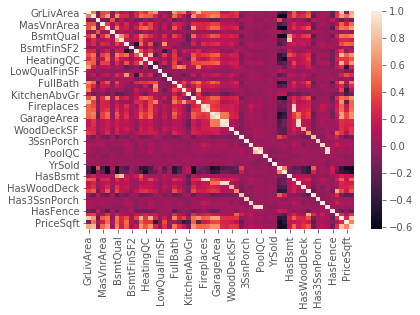

In [17]:
corr = pd.concat([ames[num_features], ames['SalePrice']], axis=1).corr()
sns.heatmap(corr)

In [ ]:
ames.hist(bins=50, figsize=(20,15))

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


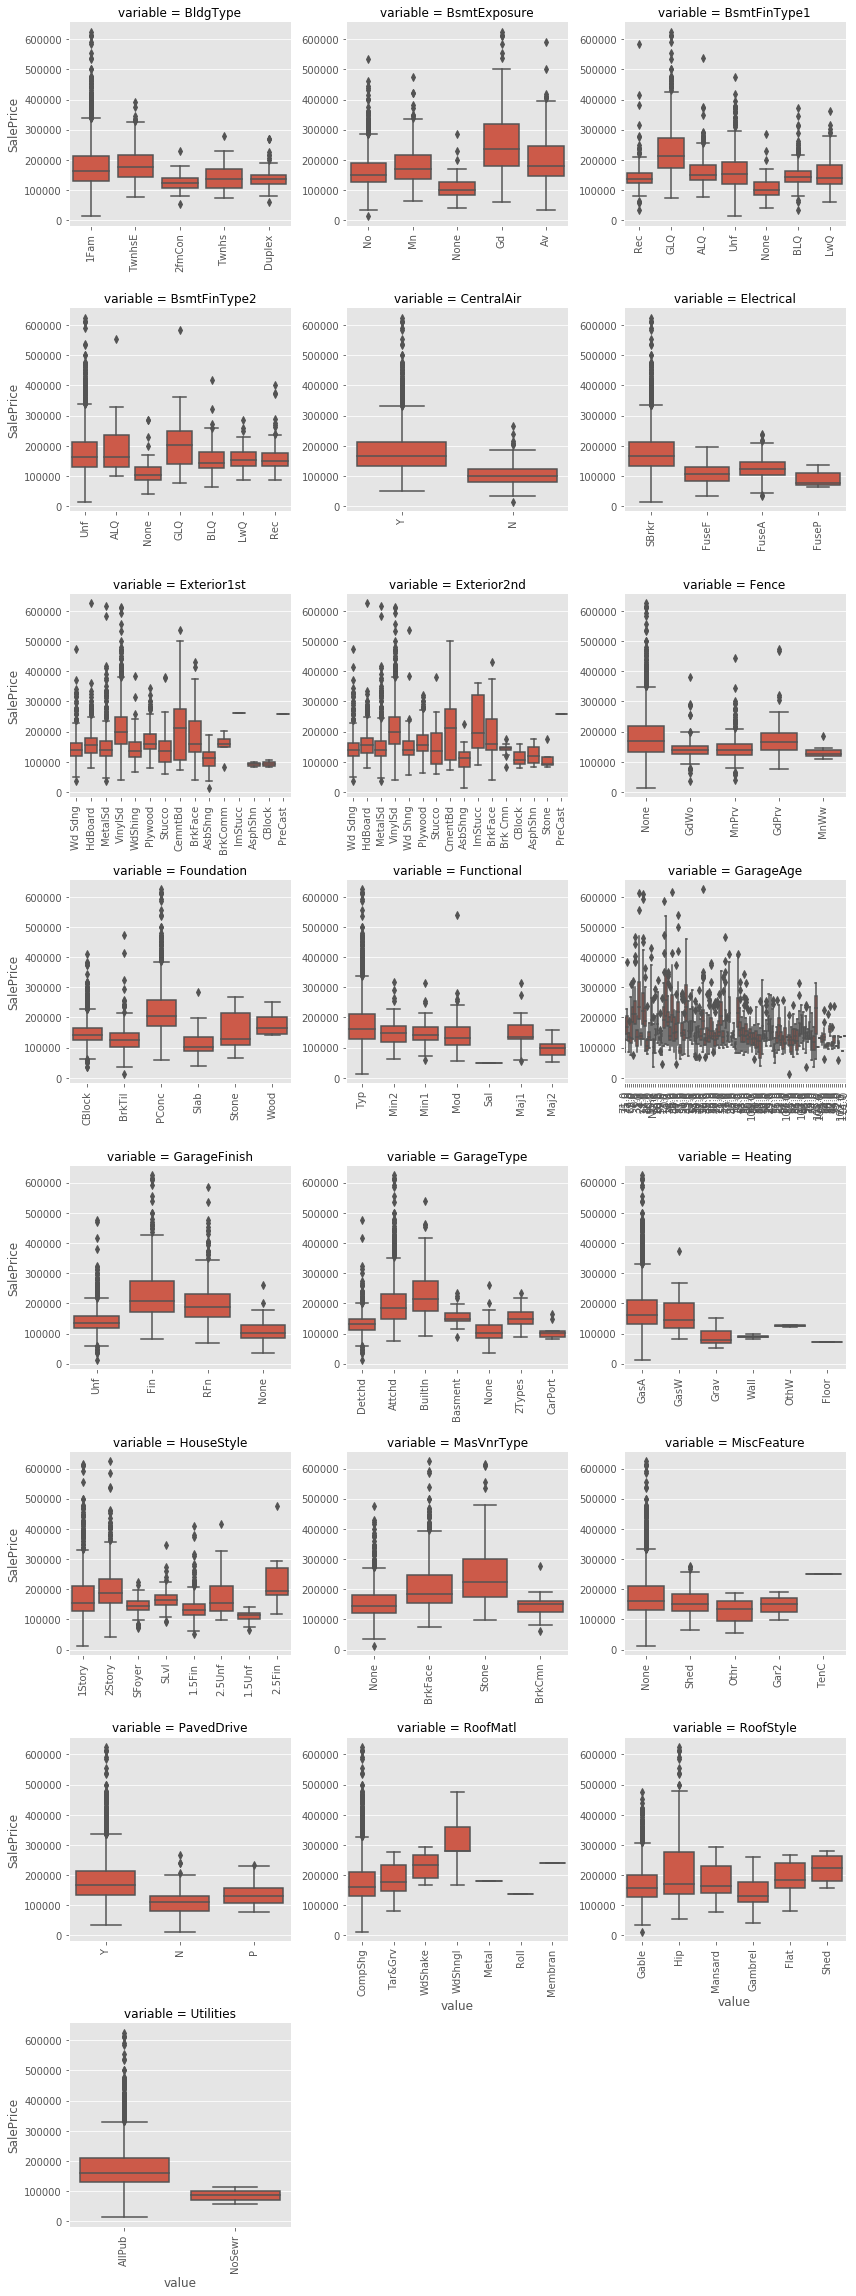

In [19]:
f = pd.melt(ames, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


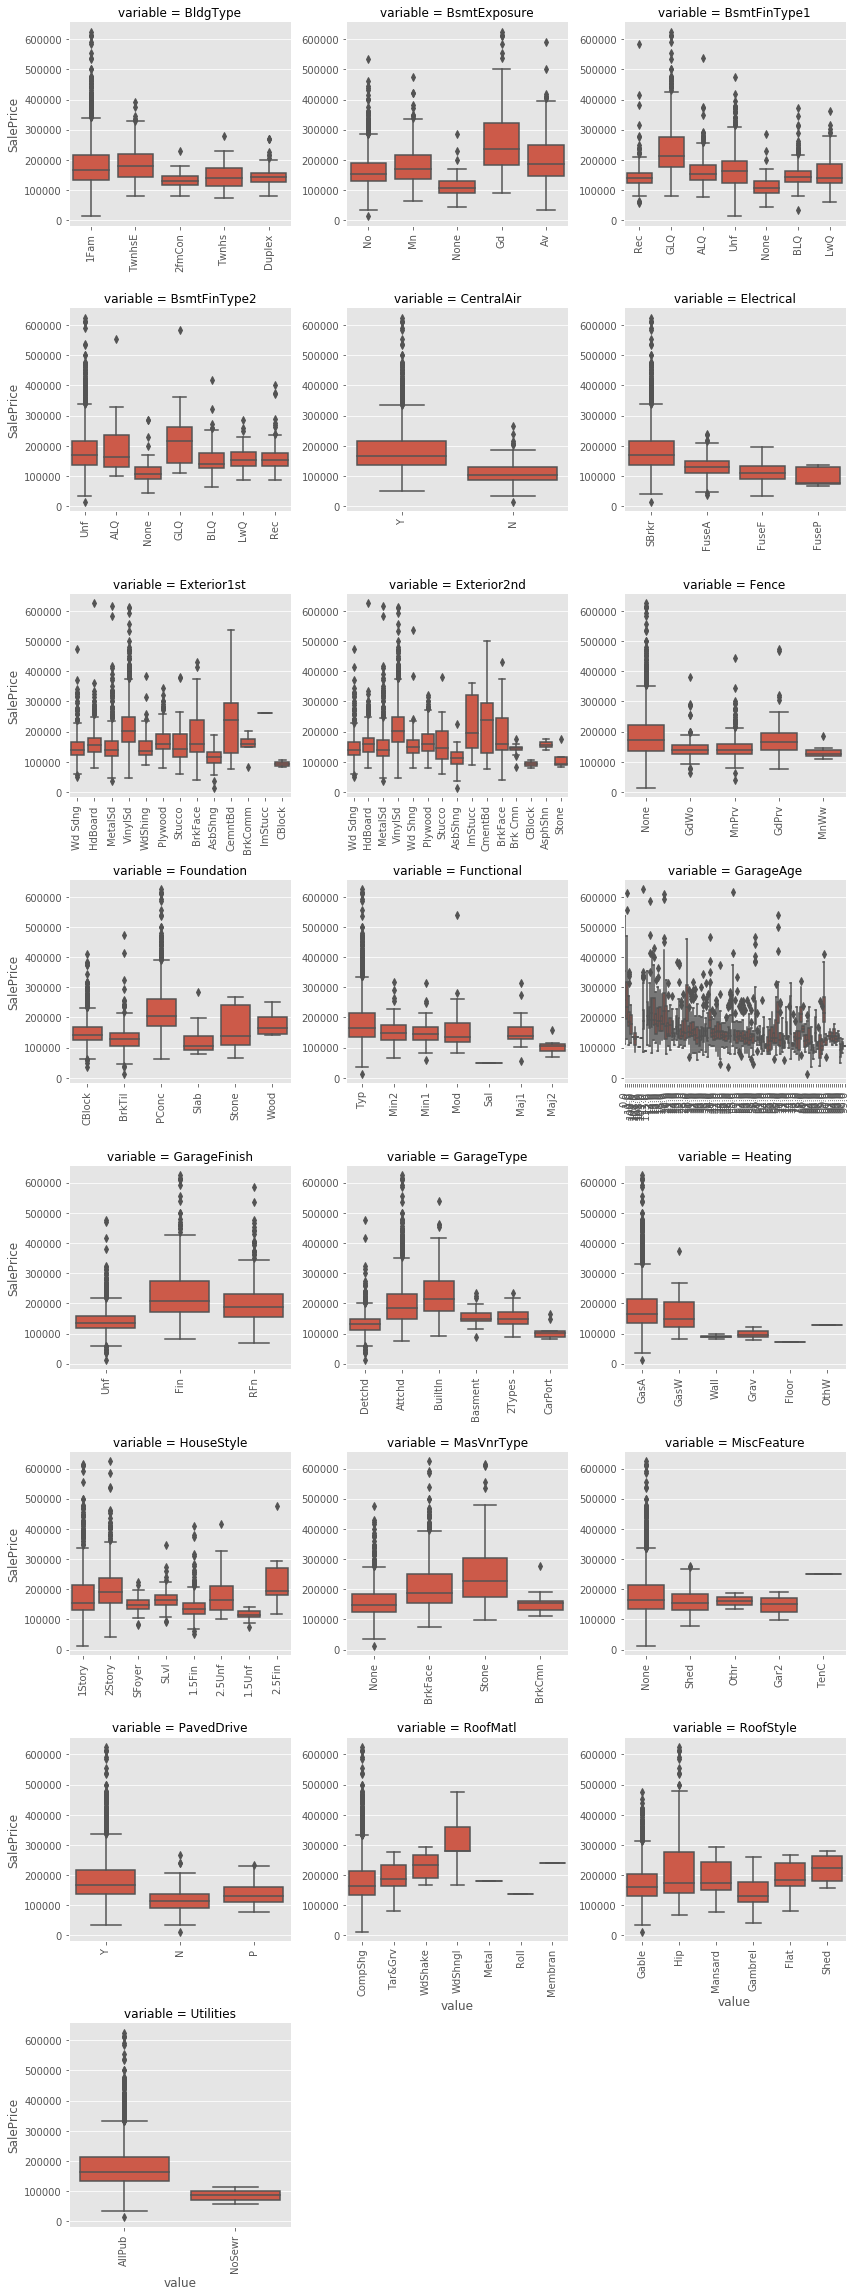

In [62]:
f = pd.melt(ames_g, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [45]:
ames_rank = ames.filter(regex='Qual$|QC$|Qu$|Cond$')
list(ames_rank.columns)

['OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


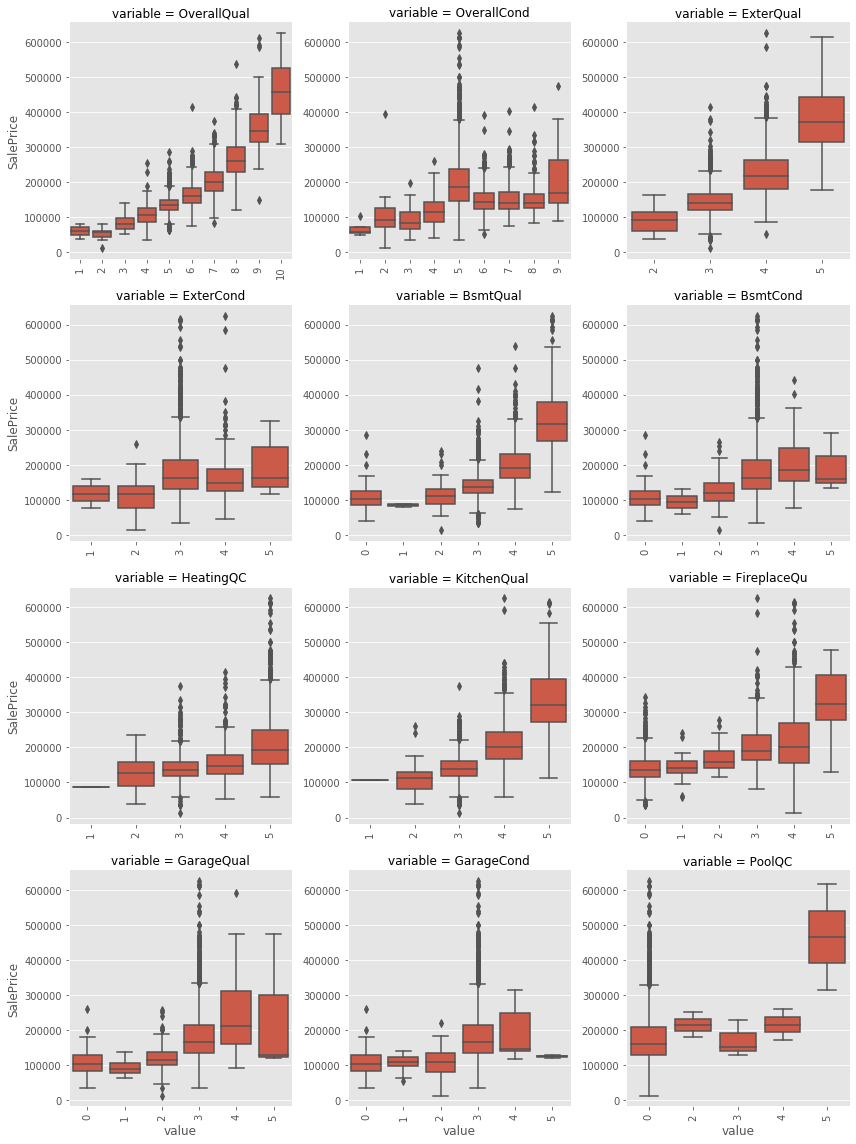

In [46]:
f = pd.melt(ames, id_vars=['SalePrice'], value_vars=list(ames_rank.columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


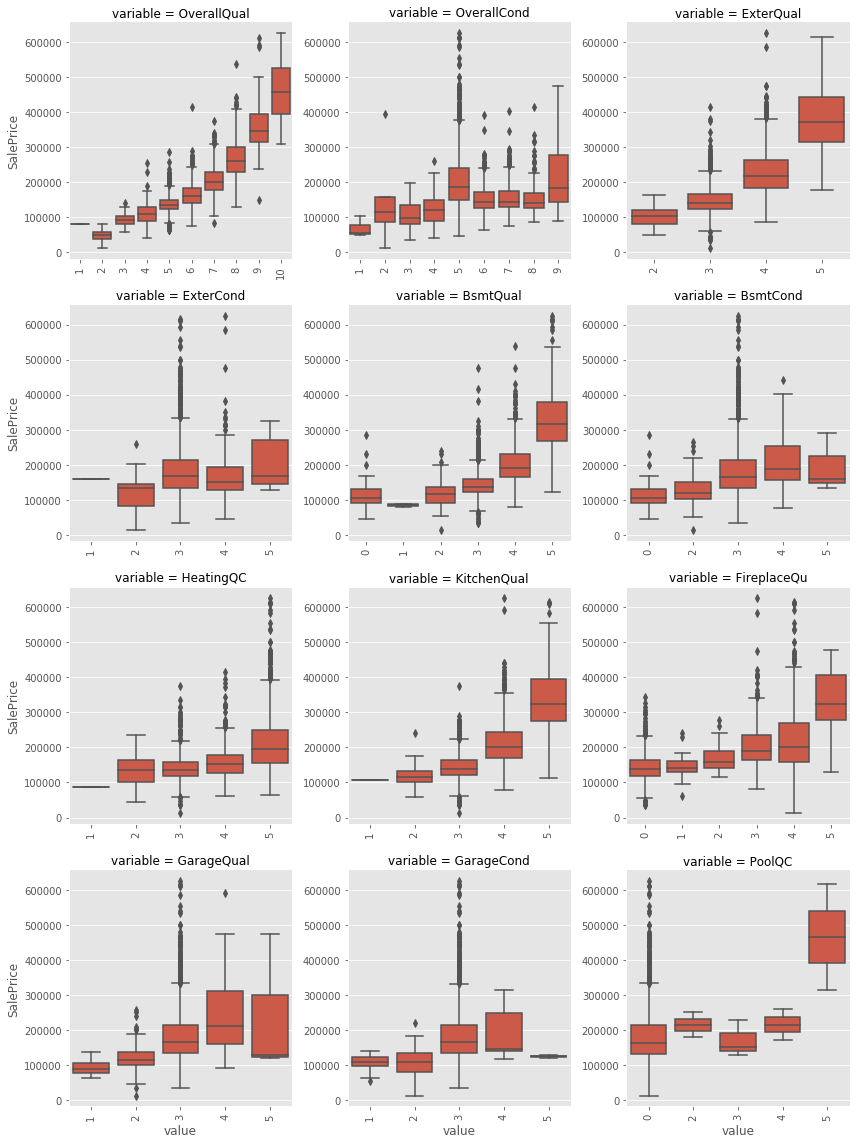

In [56]:
f = pd.melt(ames_g, id_vars=['SalePrice'], value_vars=list(ames_rank.columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Garage only

In [47]:
ames_g =ames.loc[ames['HasGarage']==1]

In [60]:
ames_b =ames.loc[ames['HasBsmt']==1]

In [61]:
ames_b.shape

(2506, 78)

In [57]:
ames_g.shape

(2448, 78)

In [58]:
ames.shape

(2575, 78)

In [52]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(ames[num_features], ames['SalePrice'])

pd.Series(p_values, index=ames[num_features].columns).sort_values()

GrLivArea          0.000000e+00
OverallQual        0.000000e+00
TotSF              0.000000e+00
ExterQual          0.000000e+00
KitchenQual       1.913091e-318
TotalBsmtSF       7.084728e-315
1stFlrSF          2.565959e-302
GarageCars        2.960455e-299
GarageArea        2.924289e-294
BsmtQual          2.110515e-241
PriceSqft         2.430050e-231
HouseAge          1.626503e-202
FullBath          9.180542e-191
FireplaceQu       3.543696e-185
RemodelAge        1.044743e-178
MasVnrArea        4.222411e-156
TotRmsAbvGrd      7.671643e-156
Fireplaces        4.860263e-154
HasFireplace      1.441379e-150
BsmtFinSF1        6.891119e-136
HeatingQC         1.243332e-121
HasOpenPorch      9.373333e-114
WoodDeckSF         7.159458e-67
OpenPorchSF        4.558903e-59
HasWoodDeck        1.844527e-58
BsmtFullBath       1.645348e-53
HasPorch           4.106614e-52
HalfBath           1.770462e-49
GarageQual         2.196186e-46
2ndFlrSF           5.277876e-40
GarageCond         9.413776e-40
HasGarag

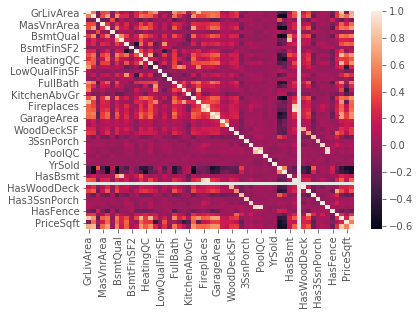

NameError: name 'hello' is not defined

In [69]:
import clean1